Data cleaning

In [26]:

!pip install openpyxl


import pandas as pd


df = pd.read_excel("/content/Car Sales.xlsx - car_data.csv.xlsx")

df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print("Missing values:\n", df.isnull().sum())

df.head()


Missing values:
 Car_id           0
Date             0
Customer_Name    1
Gender           0
Annual_Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price_$          0
Dealer_No        0
Body_Style       0
Phone            0
Dealer_Region    0
dtype: int64


,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price_$,Dealer_No,Body_Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double횂혻Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double횂혻Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double횂혻Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


COMPANY ANALYSIS

In [27]:

region_revenue = df.groupby('Dealer_Region')['Price_$'].sum().sort_values(ascending=False)


region_revenue


,Price_$
Dealer_Region,
Austin,117192531
Janesville,106351234
Scottsdale,95969374
Aurora,88687382
Greenville,88149602
Pasco,88040714
Middletown,87134628


/tmp/ipython-input-43-1658502593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='viridis')


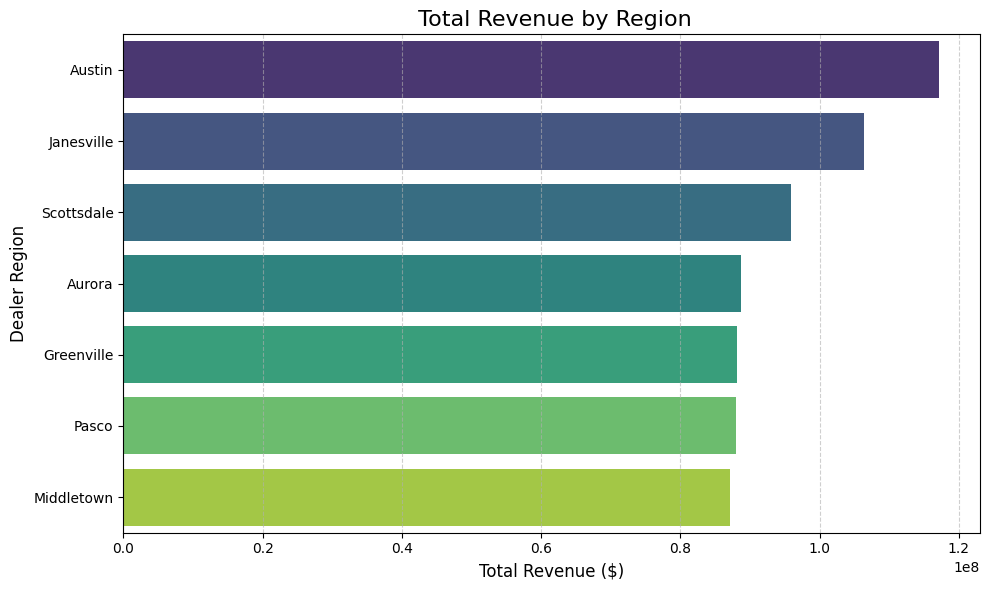

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='viridis')

plt.title(' Total Revenue by Region', fontsize=16)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Dealer Region', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


/tmp/ipython-input-44-1624676855.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_models, x='Price_$', y='Model', palette='viridis')
/tmp/ipython-input-44-1624676855.py:8: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


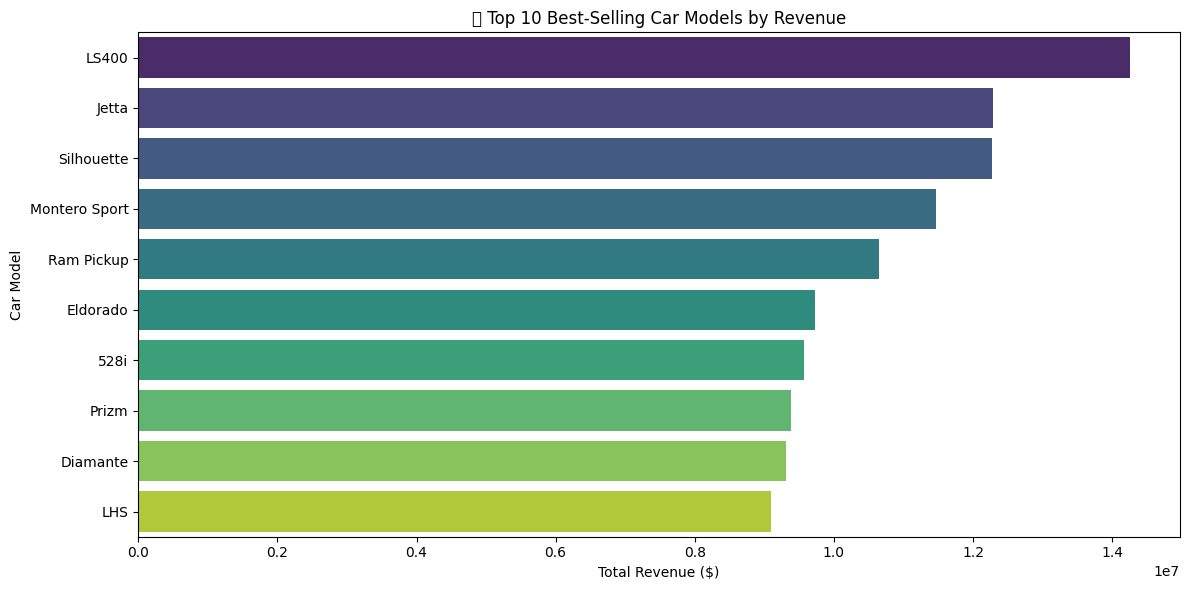

In [44]:

top_models = df.groupby('Model')['Price_$'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_models, x='Price_$', y='Model', palette='viridis')
plt.title('🚗 Top 10 Best-Selling Car Models by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()


/tmp/ipython-input-45-506126268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies, x='Price_$', y='Company', palette='coolwarm')


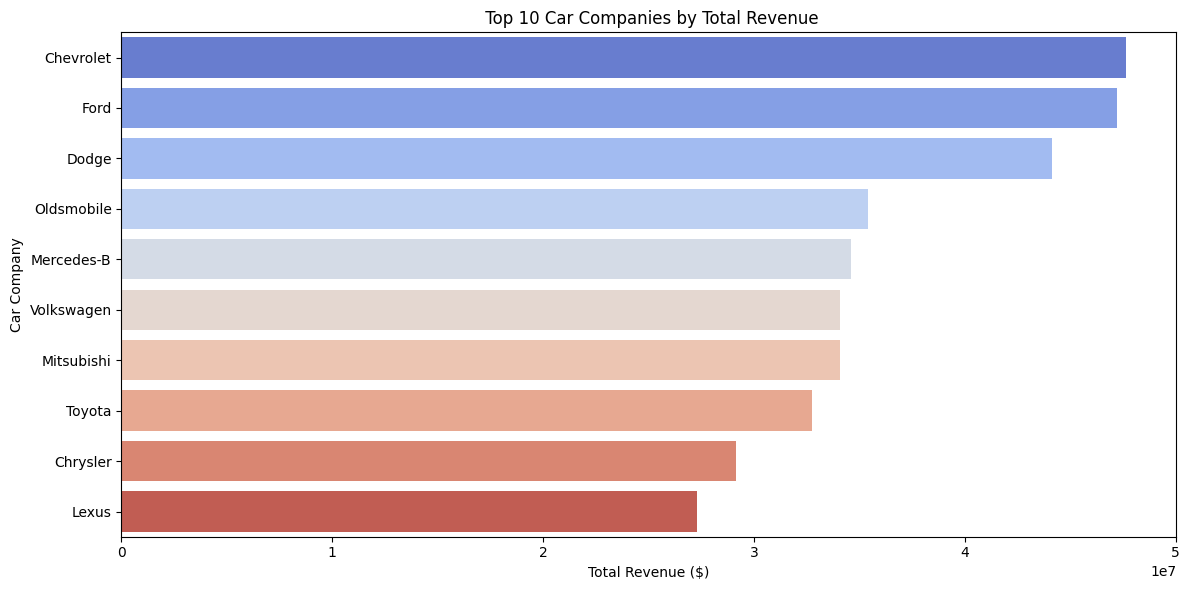

In [45]:

top_companies = df.groupby('Company')['Price_$'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_companies, x='Price_$', y='Company', palette='coolwarm')
plt.title(' Top 10 Car Companies by Total Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Car Company')
plt.tight_layout()
plt.show()


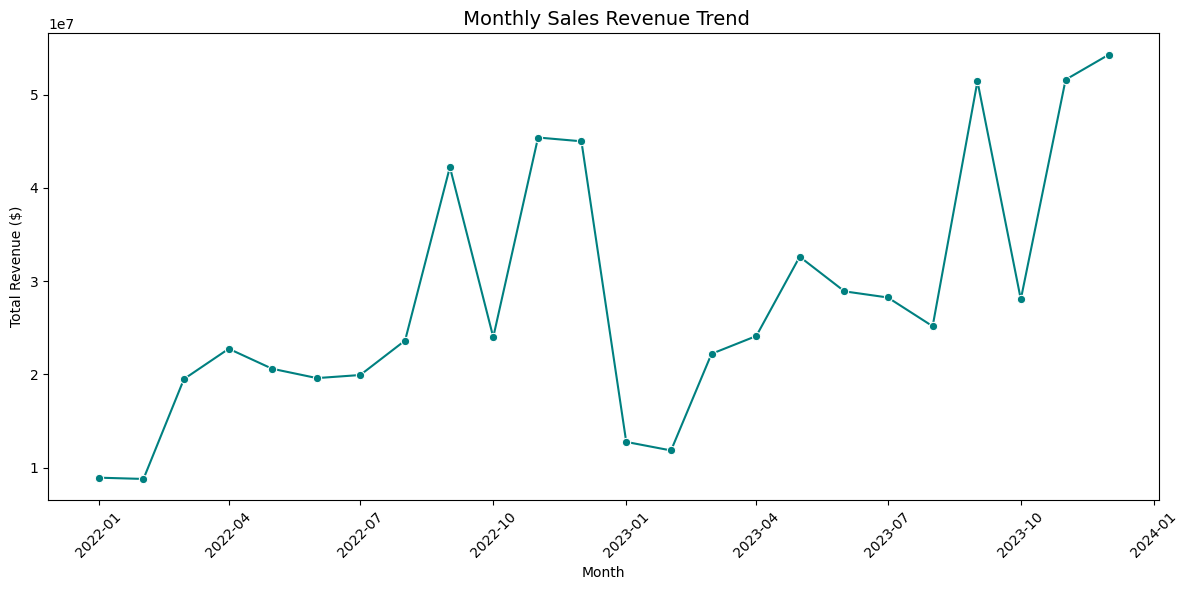

In [47]:


monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Price_$'].sum().reset_index()
monthly_revenue['Date'] = monthly_revenue['Date'].dt.to_timestamp()  # convert period to datetime for plotting


plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='Date', y='Price_$', marker='o', color='teal')
plt.title(" Monthly Sales Revenue Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-33-3421904839.py:18: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


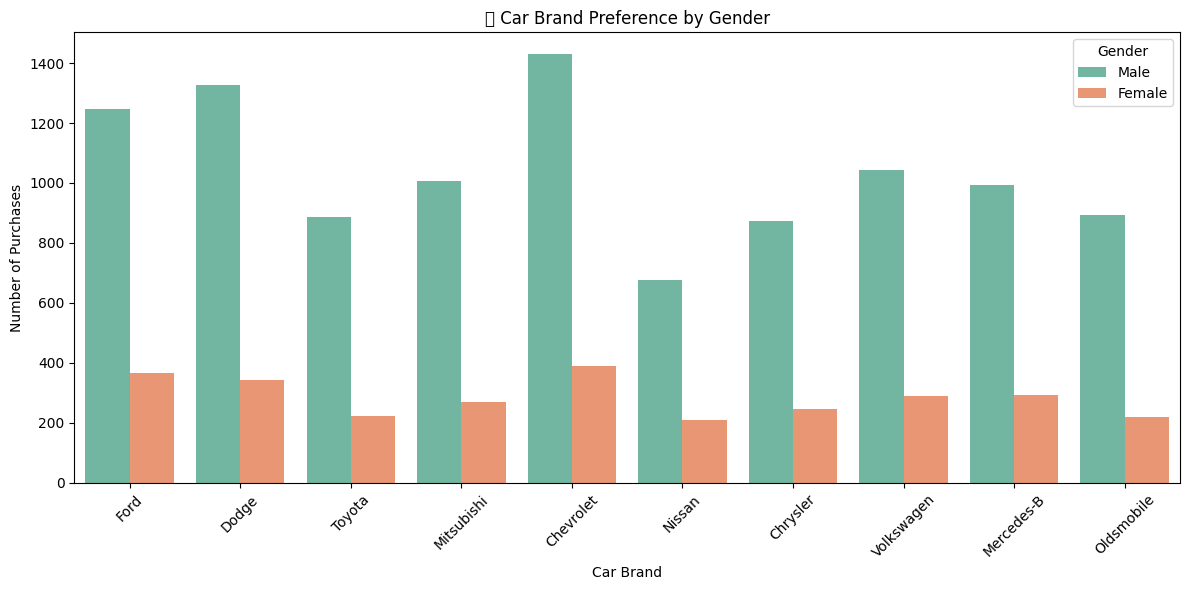

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


top_brands = df['Company'].value_counts().nlargest(10).index

top_brand_data = df[df['Company'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.countplot(data=top_brand_data, x='Company', hue='Gender', palette='Set2')
plt.title('🚘 Car Brand Preference by Gender')
plt.xlabel('Car Brand')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [34]:

def categorize_income(income):
    if income < 50000:
        return 'Low Income'
    elif income < 150000:
        return 'Middle Income'
    else:
        return 'High Income'


df['Income_Segment'] = df['Annual_Income'].apply(categorize_income)


/tmp/ipython-input-35-888213279.py:21: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


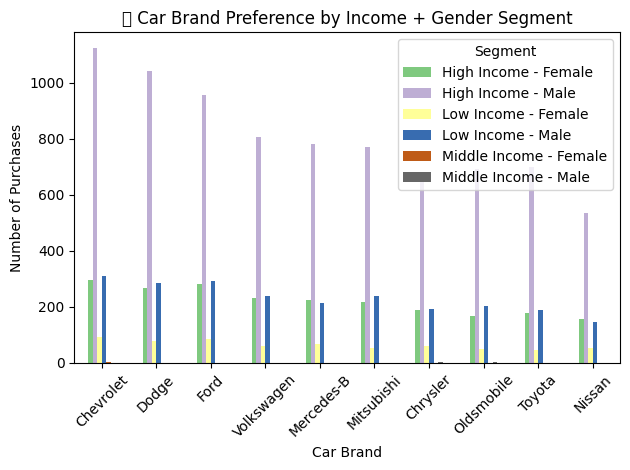

In [35]:

df['Segment'] = df['Income_Segment'] + ' - ' + df['Gender']

segment_brand_counts = df.groupby(['Company', 'Segment']).size().unstack(fill_value=0)

top_brands = segment_brand_counts.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_counts = segment_brand_counts.loc[top_brands]


import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
filtered_counts.plot(kind='bar', stacked=False, colormap='Accent')
plt.title('🚗 Car Brand Preference by Income + Gender Segment')
plt.xlabel('Car Brand')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


/tmp/ipython-input-50-484747267.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


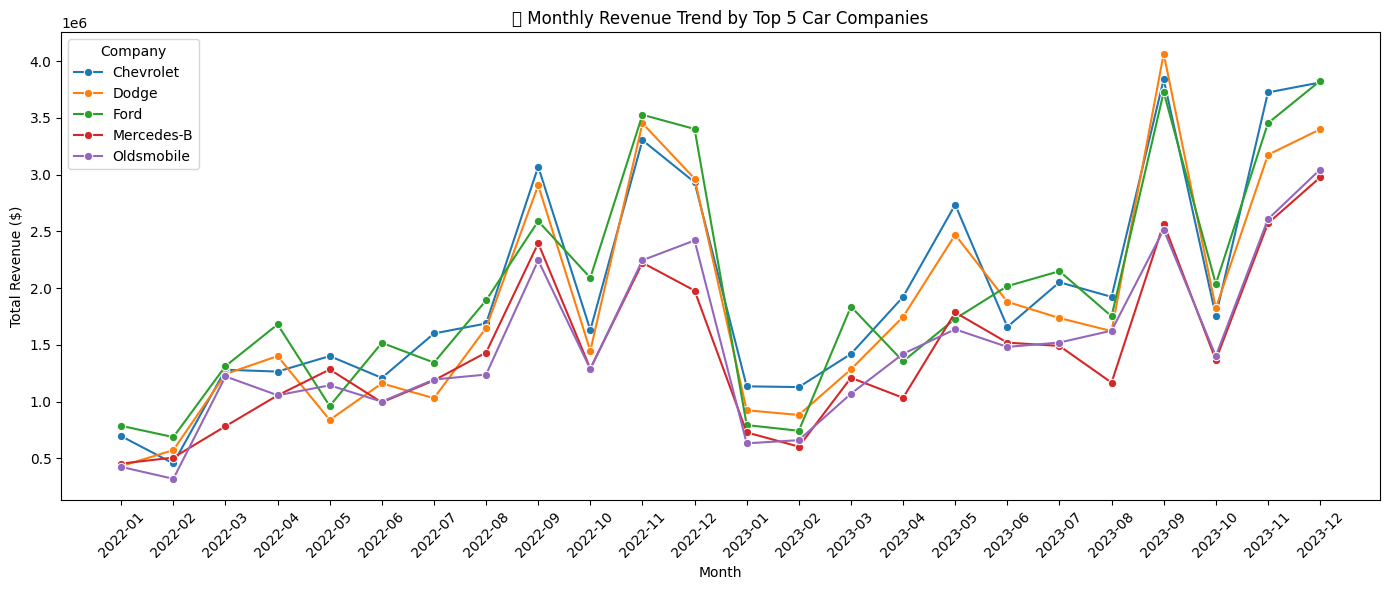

In [50]:

df['Month'] = df['Date'].dt.to_period('M').astype(str)

monthly_brand_revenue = df.groupby(['Month', 'Company'])['Price_$'].sum().reset_index()


top_5_companies = monthly_brand_revenue.groupby('Company')['Price_$'].sum().sort_values(ascending=False).head(5).index
filtered_data = monthly_brand_revenue[monthly_brand_revenue['Company'].isin(top_5_companies)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered_data, x='Month', y='Price_$', hue='Company', marker='o')
plt.xticks(rotation=45)
plt.title('📈 Monthly Revenue Trend by Top 5 Car Companies')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


In [37]:
print(df.columns.tolist())


['Car_id', 'Date', 'Customer_Name', 'Gender', 'Annual_Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price_$', 'Dealer_No', 'Body_Style', 'Phone', 'Dealer_Region', 'Income_Segment', 'Segment', 'Month']


In [38]:

luxury_brands = ['BMW', 'Mercedes-B', 'Lexus', 'Audi', 'Infiniti', 'Jaguar']
midrange_brands = ['Ford', 'Chevrolet', 'Dodge', 'Toyota', 'Nissan', 'Volkswagen', 'Honda', 'Chrysler']
economy_brands = ['Hyundai', 'Kia', 'Mitsubishi', 'Subaru', 'Buick', 'Oldsmobile', 'Pontiac', 'Plymouth', 'Saturn']

def categorize_brand(company):
    if company in luxury_brands:
        return 'Luxury'
    elif company in midrange_brands:
        return 'Mid-Range'
    elif company in economy_brands:
        return 'Economy'
    else:
        return 'Other'

df['Brand_Category'] = df['Company'].apply(categorize_brand)
df['Brand_Category'].value_counts()


,count
Brand_Category,
Mid-Range,10261
Economy,5495
Other,4430
Luxury,3720


In [59]:
print(X_train.columns.tolist())


['Annual_Income', 'Dealer_Region_Aurora', 'Dealer_Region_Austin', 'Dealer_Region_Greenville', 'Dealer_Region_Janesville', 'Dealer_Region_Middletown', 'Dealer_Region_Pasco', 'Dealer_Region_Scottsdale', 'Gender_Female', 'Gender_Male', 'Income_Segment_High Income', 'Income_Segment_Low Income', 'Income_Segment_Middle Income']


/tmp/ipython-input-60-532445823.py:31: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


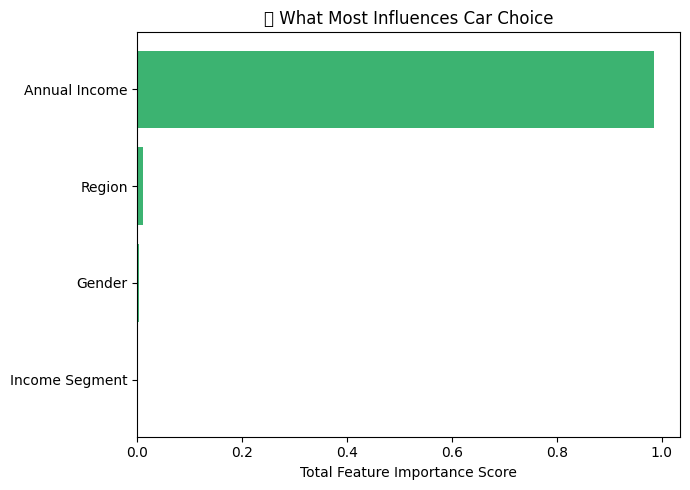

In [60]:
from collections import defaultdict

feature_group_map = {}
for col in X_train.columns:
    if col.startswith('Annual_Income'):
        feature_group_map[col] = 'Annual Income'
    elif col.startswith('Gender_'):
        feature_group_map[col] = 'Gender'
    elif col.startswith('Dealer_Region_'):
        feature_group_map[col] = 'Region'
    elif col.startswith('Income_Segment_'):
        feature_group_map[col] = 'Income Segment'
    else:
        feature_group_map[col] = 'Other'

group_importance = defaultdict(float)

for feature, score in zip(X_train.columns, rf.feature_importances_):
    group = feature_group_map.get(feature, 'Other')
    group_importance[group] += score

# Create DataFrame and sort
group_df = pd.DataFrame(group_importance.items(), columns=['Feature Group', 'Total Importance'])
group_df = group_df.sort_values(by='Total Importance', ascending=False)

# Plot
plt.figure(figsize=(7, 5))
plt.barh(group_df['Feature Group'][::-1], group_df['Total Importance'][::-1], color='mediumseagreen')
plt.title('🧠 What Most Influences Car Choice')
plt.xlabel('Total Feature Importance Score')
plt.tight_layout()
plt.show()


In [40]:
# Rename columns for clarity
X = X.rename(columns={
    'Annual_Income': 'Exact Income (USD)',
    'Income_Segment': 'Income Category (Low/Mid/High)'
})


In [41]:
feature_group_map = {
    'Exact Income (USD)': 'Income',
    'Income Category (Low/Mid/High)': 'Income',
    'Dealer_Region': 'Region',
    'Gender_Female': 'Gender',
    'Gender_Male': 'Gender',
    # etc.
}


In [42]:
from IPython.display import display
display(group_df.sort_values(by='Total Importance', ascending=False))


,Feature Group,Total Importance
0,Other,0.985192
1,Region,0.010014
2,Gender,0.003259
3,Income Segment,0.001535
